In [2]:
from requests import get
from bs4 import BeautifulSoup
import os
import pandas as pd
import acquire_news_articles
import prepare

In [3]:
from typing import List
import unicodedata
import re
import json

import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib default plotting styles
plt.rc("patch", edgecolor="black", force_edgecolor=True)
plt.rc("axes", grid=True)
plt.rc("grid", linestyle=":", linewidth=0.8, alpha=0.7)
plt.rc("axes.spines", right=False, top=False)
plt.rc("figure", figsize=(11, 8))
plt.rc("font", size=12.0)
plt.rc("hist", bins=25)

In [4]:
def clean(text: str) -> List[str]:
    "a simple function to prepare text data"
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words("english") + ["r", "u", "2", "ltgt"]
    text = (
        unicodedata.normalize("NFKD", text)
        .encode("ascii", "ignore")
        .decode("utf-8", "ignore")
        .lower()
    )
    words = re.sub(r"[^\w\s]", "", text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [6]:
df = acquire_news_articles.get_news_articles()

In [8]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [9]:
df.head()

,author,category,content,published_date,title
0,Pragya Swastik,business,Former Finance Minister P Chidambaram on Thurs...,2019-12-05T10:41:04.000Z,"8, 7, 6.6, 5.8, 5 & 4.5 is the state of econom..."
1,Kanishka Pandey,business,Google Co-founders Sergey Brin and Larry Page ...,2019-12-05T06:36:23.000Z,Google Co-founders gain $2.3B after Sundar Pic...
2,Kanishka Pandey,business,Google's 47-year-old India-born CEO Sundar Pic...,2019-12-06T03:32:57.000Z,Sundar Pichai rejected Google shares worth mil...
3,Kanishka Pandey,business,"SoftBank Founder and CEO Masayoshi Son, in a d...",2019-12-06T11:27:06.000Z,Gut feeling drove me to invest $20M in Alibaba...
4,Krishna Veera Vanamali,business,In a bid to provide relief to depositors of sc...,2019-12-05T12:42:14.000Z,Maharashtra govt suggests merger of PMC Bank w...


In [13]:
# how many contributing authors
df.author.value_counts()

Anmol Sharma              12
Ankur Taliyan             12
Udit Gupta                12
Kanishka Pandey           10
Krishna Veera Vanamali     9
Dharna                     8
Anushka Dixit              8
Aishwarya                  7
Atul Mishra                4
Arshiya Chopra             3
Daisy Mowke                3
Dishant Sharma             3
Nandini Sinha              3
Pragya Swastik             2
Sakshita Khosla            2
Ankush Verma               1
Roshan Gupta               1
Name: author, dtype: int64

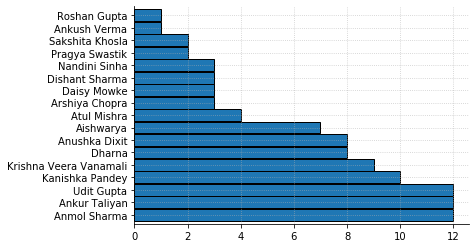

In [16]:
df.author.value_counts().plot.barh(width = .95)

In [14]:
# how many categories
# will be interested in sentiment or freq used word (wording difference) 
# among different categories
df.category.value_counts()

sports           25
business         25
entertainment    25
technology       25
Name: category, dtype: int64

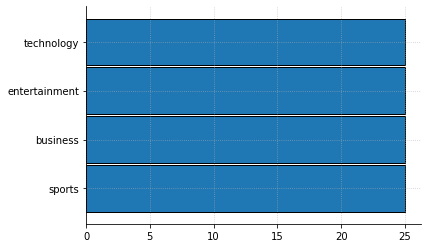

In [17]:
df.category.value_counts().plot.barh(width = .95)

In [ ]:
freq = pd.Series(" ".join(clean_df.clean).split()).value_counts()
redo = " ".join(clean_df.clean) # turn into 1 big string > wordcloud
whole = clean(redo) # clean data > ngram
pd.Series(nltk.bigrams(whole)).value_counts().head(15).plot.barh(width=.95)

# use lambda to assign "input" string into vedar for sentiment analysis
# sia.polarity_scores(input) 
# use cleaned data stored in df for ease of pandas operation
clean_df["vader_sentiment"] = clean_df.clean.apply(lambda txt: sia.polarity_scores(txt)["compound"])

# create analysis object
from afinn import Afinn
sa = Afinn()

clean_df["afinn_sentiment"] = clean_df.clean.apply(sa.score)

In [ ]:
# content & title might need some cleaning

In [20]:
# freq_title = pd.Series(" ".join(df.title).split()).value_counts()
# freq_content = pd.Series(" ".join(df.content).split()).value_counts()

In [28]:
string_title = " ".join(df.title) # turn into string for prep
string_content = " ".join(df.content)
string_title

"8, 7, 6.6, 5.8, 5 & 4.5 is the state of economy: Chidambaram on GDP growth Google Co-founders gain $2.3B after Sundar Pichai made Alphabet CEO Sundar Pichai rejected Google shares worth millions in 2018: Bloomberg Gut feeling drove me to invest $20M in Alibaba in 2000: SoftBank CEO Maharashtra govt suggests merger of PMC Bank with MSC Bank Nirav Modi declared fugitive economic offender over ₹14,000-crore PNB scam Asian Development Bank approves $1 billion emergency loan for Pakistan RBI probing net banking and mobile banking outage at HDFC Bank Air India's loss in 2018-19 provisionally estimated at record ₹8,556 crore Indonesia fires flag carrier's CEO for smuggling ₹41 lakh Harley on jet Jaigarh LNG terminal to launch in 1st quarter 2020: Hiranandani's H-Energy RBI survey shows Indian consumers most pessimistic in over 5 years Want control of manufacturing if we win $15bn India fighter jet deal: Saab Vodafone Idea will have to shut shop if there's no govt relief: Kumar Birla RBI cuts

In [41]:
prep_title = clean(string_title) # clean data, in a list
prep_content = clean(string_content)
prep_content

['former',
 'finance',
 'minister',
 'p',
 'chidambaram',
 'thursday',
 'said',
 'nothing',
 'sum',
 'state',
 'economy',
 'better',
 'following',
 'series',
 'number',
 '8',
 '7',
 '66',
 '58',
 '5',
 '45',
 'added',
 'quarterly',
 'growth',
 'rate',
 'gdp',
 'last',
 'six',
 'quarter',
 'well',
 'lucky',
 'growth',
 'rate',
 'touch',
 '5',
 'year',
 'end',
 'said',
 'google',
 'cofounder',
 'sergey',
 'brin',
 'larry',
 'page',
 'added',
 'combined',
 '23',
 'billion',
 'net',
 'worth',
 'googleparent',
 'alphabet',
 'stock',
 'rose',
 'bloomberg',
 'revealed',
 'came',
 'google',
 '47yearold',
 'indiaborn',
 'ceo',
 'sundar',
 'pichai',
 'wednesday',
 'also',
 'named',
 'alphabet',
 'ceo',
 'two',
 'cofounder',
 '6',
 'internet',
 'giant',
 'still',
 'control',
 'alphabet',
 'special',
 'voting',
 'share',
 'google',
 '47yearold',
 'indiaborn',
 'ceo',
 'sundar',
 'pichai',
 'recently',
 'named',
 'ceo',
 'googleparent',
 'alphabet',
 'well',
 'rejected',
 'big',
 'new',
 'grant',
 

Text(0.5, 1.0, '10 most common words in Inshort news articles')

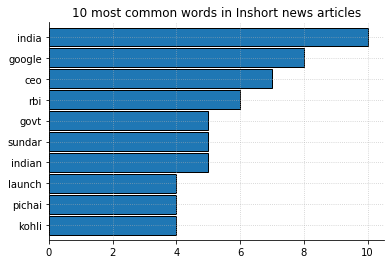

In [35]:
pd.Series(prep_title).value_counts().sort_values().tail(10).plot.barh(width=.9)
plt.title('10 most common words in Inshort news articles')

Text(0.5, 1.0, '10 most common words in Inshort news articles')

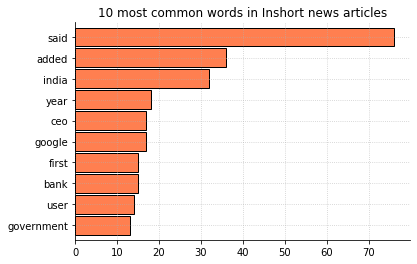

In [39]:
pd.Series(prep_content).value_counts().sort_values().tail(10).plot.barh(width=.9, color = 'coral')
plt.title('10 most common words in Inshort news articles')

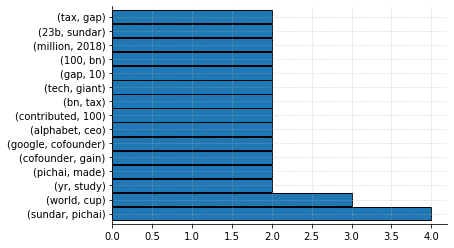

In [37]:
pd.Series(nltk.bigrams(prep_title)).value_counts().head(15).plot.barh(width=.95)

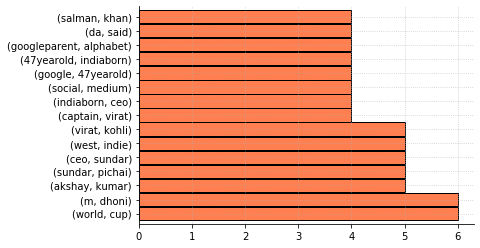

In [40]:
pd.Series(nltk.bigrams(prep_content)).value_counts().head(15).plot.barh(width=.95, color = 'coral')

In [ ]:
# string_title = " ".join(df.title) # turn into string for prep
# string_content = " ".join(df.content)

# prep_title = clean(string_title) # clean data, in a list
# prep_content = clean(string_content)

In [43]:
cleaned_string_title = ' '.join(prep_title)
cleaned_string_content = ' '.join(prep_content)

(-0.5, 1199.5, 799.5, -0.5)

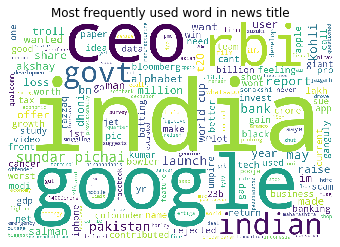

In [44]:
from wordcloud import WordCloud 

# wordcloud create image object
# random_state fix the color so it won't change everytime we rerun the code

# input for wordcloud = full content in string
img = WordCloud(background_color="white", height=800, width=1200, random_state = 123).generate(cleaned_string_title)

# if no plt.imshow(img), the image won't showup
plt.imshow(img)
plt.title('Most frequently used word in news title')

# if no axis("off"), there will be auto created gridline underneath the cloud
plt.axis("off")

(-0.5, 1199.5, 799.5, -0.5)

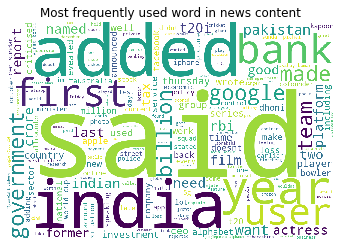

In [45]:
img = WordCloud(background_color="white", height=800, width=1200, random_state = 123).generate(cleaned_string_content)
plt.imshow(img)
plt.title('Most frequently used word in news content')
plt.axis("off")

In [46]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [48]:
# use lambda to assign "input" string into vedar for sentiment analysis
# sia.polarity_scores(input) 
vader_title = pd.Series(prep_title).apply(lambda txt: sia.polarity_scores(txt)["compound"])

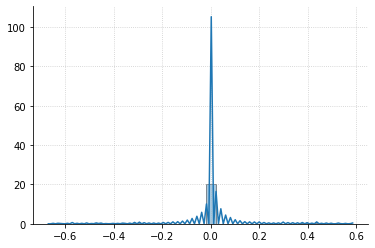

In [49]:
sns.distplot(vader_title)

In [50]:
vader_content = pd.Series(prep_content).apply(lambda txt: sia.polarity_scores(txt)["compound"])

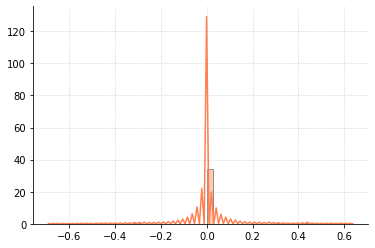

In [51]:
sns.distplot(vader_content, color = 'coral')